In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.stats.api as sms
from tqdm.notebook import tqdm
from scipy.stats import ttest_ind, mannwhitneyu
import seaborn as sns
plt.rcParams['figure.figsize']=(5,3)

In [9]:
mde = 0.05
baseline = 0.2
sample_size = 1030

Fisher exact test
Z test == Chi square test
T test
Bootstrap (Monte-Carlo)

Н0: разницы между группами нет == выборки пришли из одного распределения

In [10]:
result = []
for _ in tqdm(range(10000)):
    a = np.random.binomial(1,baseline,size=sample_size)
    b = np.random.binomial(1,baseline + mde,size=sample_size)
    _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
    result.append(pval)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [11]:
t = pd.Series(result)

<Axes: >

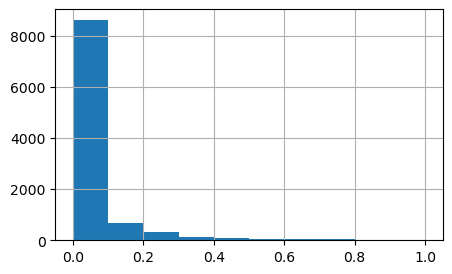

In [12]:
t.hist()

In [13]:
(t < 0.05).mean()

0.7766

In [14]:
result = []
for _ in tqdm(range(10000)):
    a = np.random.binomial(1,baseline,size=sample_size)
    b = np.random.binomial(1,baseline + mde,size=sample_size)
    _, pval = ttest_ind(a,b,equal_var=False)
    result.append(pval)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [15]:
t = pd.Series(result)

In [16]:
(t < 0.05).mean()

0.7768

In [17]:
result = []
for _ in tqdm(range(10000)):
    a = np.random.binomial(1,baseline,size=sample_size)
    b = np.random.binomial(1,baseline + mde,size=sample_size)
    _, pval = mannwhitneyu(a,b)
    result.append(pval)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [18]:
t = pd.Series(result)

In [19]:
(t < 0.05).mean()

0.7771

In [31]:
result = []
for _ in tqdm(range(10000)):
    a = np.random.binomial(1,baseline,size=sample_size)
    b = np.random.binomial(1,baseline,size=sample_size)
    _, pval = mannwhitneyu(a,b)
    result.append(pval)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [32]:
t = pd.Series(result)

<Axes: >

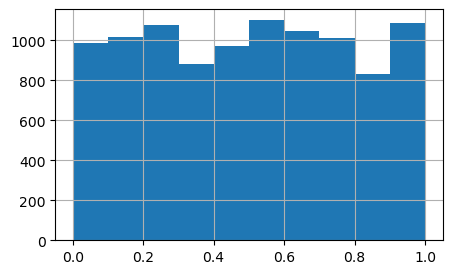

In [33]:
t.hist()

<Axes: ylabel='Proportion'>

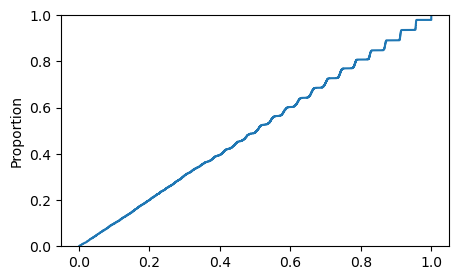

In [34]:
sns.ecdfplot(t)

In [35]:
(t < 0.05).mean()

0.0477

In [36]:
result = []
for _ in tqdm(range(10000)):
    a = np.random.binomial(1,baseline,size=sample_size)
    b = np.random.binomial(1,baseline,size=sample_size)
    _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
    result.append(pval)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [37]:
t = pd.Series(result)

<Axes: >

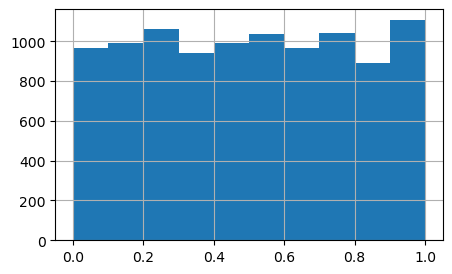

In [38]:
t.hist()

<Axes: ylabel='Proportion'>

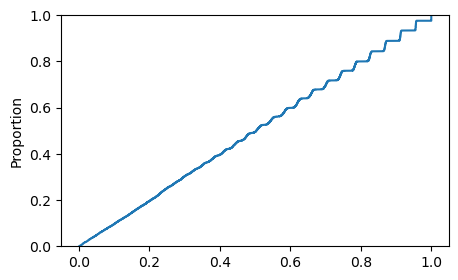

In [39]:
sns.ecdfplot(t)

In [40]:
(t < 0.05).mean()

0.0487

# Сэмплы в питоне

In [42]:
es = sms.proportion_effectsize(0.20, 0.25)
sample_size = round(sms.NormalIndPower().solve_power(es, power=0.80, alpha=0.05, ratio=1))

In [43]:
sample_size

1092

In [44]:
result = []
for _ in tqdm(range(10000)):
    a = np.random.binomial(1,baseline,size=sample_size)
    b = np.random.binomial(1,baseline + mde,size=sample_size)
    _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
    result.append(pval)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [45]:
t = pd.Series(result)

In [46]:
(t < 0.05).mean()

0.8054

1/3

In [47]:
es = sms.proportion_effectsize(0.20, 0.25)
sample_size1 = round(sms.NormalIndPower().solve_power(es, power=0.80, alpha=0.05, ratio=1/3))

In [48]:
sample_size1

2184

In [49]:
sample_size2 = round(sample_size1 * 1/3)

In [50]:
sample_size2

728

In [51]:
result = []
for _ in tqdm(range(10000)):
    a = np.random.binomial(1,baseline,size=sample_size1)
    b = np.random.binomial(1,baseline + mde,size=sample_size2)
    _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
    result.append(pval)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [52]:
t = pd.Series(result)

In [53]:
(t < 0.05).mean()

0.8038

In [54]:
sample_size = 8393
baseline = 0.3
mde = 0.02
result = []
for _ in tqdm(range(1000)):
    a = np.random.binomial(1,baseline,size=sample_size)
    b = np.random.binomial(1,baseline + mde,size=sample_size)
    _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
    result.append(pval)

t = pd.Series(result)
(t < 0.05).mean()

  0%|          | 0/1000 [00:00<?, ?it/s]

0.793

In [55]:
es = sms.proportion_effectsize(0.30, 0.32)
sms.NormalIndPower().solve_power(es, power=0.80, alpha=0.05, ratio=1)

8392.38536140766

In [56]:
# 0.2 , 0.25 | разница была

In [57]:
sample_size = 8393
baseline = 0.3
mde = 0.02
result = []
for _ in tqdm(range(1000)):
    a = np.random.binomial(1,baseline,size=sample_size)
    b = np.random.binomial(1,baseline + mde,size=sample_size)
    _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
    result.append((1,pval))

  0%|          | 0/1000 [00:00<?, ?it/s]

In [58]:
t = pd.DataFrame(result,columns=['y_true','y_score'])

In [59]:
t['y_pred'] = (t['y_score'] < 0.05)*1

In [60]:
t

,y_true,y_score,y_pred
0,1,0.000394,1
1,1,0.232139,0
2,1,0.000105,1
3,1,0.004471,1
4,1,0.000178,1
...,...,...,...
995,1,0.004422,1
996,1,0.002184,1
997,1,0.000244,1
998,1,0.035548,1


In [61]:
t['y_pred'].mean()

0.803

In [63]:
sample_size = 8393
baseline = 0.3
mde = 0.02
result = []
for _ in tqdm(range(1000)):
    a = np.random.binomial(1,baseline,size=sample_size)
    b = np.random.binomial(1,baseline,size=sample_size)
    _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
    result.append((0,pval))

  0%|          | 0/1000 [00:00<?, ?it/s]

In [64]:
t = pd.DataFrame(result,columns=['y_true','y_score'])

In [65]:
t['y_pred'] = (t['y_score'] < 0.05)*1

In [66]:
t

,y_true,y_score,y_pred
0,0,0.710603,0
1,0,0.325886,0
2,0,0.578320,0
3,0,0.511530,0
4,0,0.554966,0
...,...,...,...
995,0,0.826714,0
996,0,0.545598,0
997,0,0.266573,0
998,0,0.801018,0


In [67]:
t['y_pred'].mean()

0.048

In [68]:
sample_size = 1090
baseline = 0.2
mde = 0.05
result = []
class_balance = 0.5
for _ in tqdm(range(10000)):
    if np.random.binomial(1,class_balance):
        a = np.random.binomial(1,baseline,size=sample_size)
        b = np.random.binomial(1,baseline,size=sample_size)
        _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
        result.append((0,pval))
    else:
        a = np.random.binomial(1,baseline,size=sample_size)
        b = np.random.binomial(1,baseline + mde,size=sample_size)
        _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
        result.append((1,pval))

  0%|          | 0/10000 [00:00<?, ?it/s]

In [69]:
t = pd.DataFrame(result,columns=['y_true','y_score'])

In [70]:
t['y_pred'] = (t['y_score'] < 0.05)*1

In [71]:
t['y_true'].mean()

0.506

In [72]:
t

,y_true,y_score,y_pred
0,1,0.004622,1
1,1,0.001186,1
2,0,0.111802,0
3,1,0.004102,1
4,0,0.526101,0
...,...,...,...
9995,0,0.029465,1
9996,1,0.005964,1
9997,1,0.000601,1
9998,0,0.917167,0


In [73]:
from sklearn.metrics import classification_report

In [74]:
t['y_pred'] = (t['y_score'] < 0.05)*1

In [75]:
print(classification_report(t['y_true'],t['y_pred']))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4940
           1       0.95      0.80      0.87      5060

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



In [76]:
t[t['y_pred'] == 1]['y_true'].mean()

0.9465078252744685

Изменим баланс классов

In [78]:
sample_size = 1090
baseline = 0.2
mde = 0.05
result = []
class_balance = 0.95
for _ in tqdm(range(10000)):
    if np.random.binomial(1,class_balance):
        a = np.random.binomial(1,baseline,size=sample_size)
        b = np.random.binomial(1,baseline,size=sample_size)
        _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
        result.append((0,pval))
    else:
        a = np.random.binomial(1,baseline,size=sample_size)
        b = np.random.binomial(1,baseline + mde,size=sample_size)
        _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
        result.append((1,pval))

  0%|          | 0/10000 [00:00<?, ?it/s]

In [79]:
t = pd.DataFrame(result,columns=['y_true','y_score'])

In [80]:
t['y_pred'] = (t['y_score'] < 0.05)*1

In [81]:
t['y_true'].mean()

0.0487

In [82]:
print(classification_report(t['y_true'],t['y_pred']))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      9513
           1       0.45      0.80      0.58       487

    accuracy                           0.94     10000
   macro avg       0.72      0.88      0.77     10000
weighted avg       0.96      0.94      0.95     10000



In [83]:
t[t['y_pred'] == 1]['y_true'].mean()

0.45348837209302323

In [84]:
t['y_pred'] = (t['y_score'] < 0.01)*1

In [85]:
t['y_true'].mean()

0.0487

In [86]:
print(classification_report(t['y_true'],t['y_pred']))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      9513
           1       0.77      0.59      0.67       487

    accuracy                           0.97     10000
   macro avg       0.88      0.79      0.83     10000
weighted avg       0.97      0.97      0.97     10000



In [87]:
t[t['y_pred'] == 1]['y_true'].mean()

0.7744565217391305

https://vkteam.medium.com/practitioners-guide-to-statistical-tests-ed2d580ef04f